## MOOC
Create a synthetic graph from the  MOOC bipratitate graph.

In [1]:
# import modules
import os
os.chdir('..')
print(os.getcwd())

import pickle
from tigger_package.orchestrator import Orchestrator
from tigger_package.tools import plot_adj_matrix
import networkx as nx 
import time

/Users/tonpoppe/workspace/tigger_adj_rep/tigger_adj
loaded
loaded


## GRAPHSAGE hyperparam

creating neighbors dicts


  0%|          | 0/178443 [00:00<?, ?it/s]

number of features 3
number of nodes, 7144
device is cpu
create edge list


  0%|          | 0/7144 [00:00<?, ?it/s]

shuffling
Epoch: 2980, loss: 0.8859012126922607, elapsed time 0.05, remaining time: 0.97Saving to ,  data/mooc/embed/model//graphsage0.pth

 Start boosting
boost iter:0
Epoch: 1480, loss: 0.8632846474647522, elapsed time 0.05, remaining time: 0.90Saving to ,  data/mooc/embed/model//graphsage0_0.pth
boost iter:1
Epoch: 1480, loss: 0.8409737348556519, elapsed time 0.04, remaining time: 0.90Saving to ,  data/mooc/embed/model//graphsage0_1.pth
duration 346.074136 sec
Saving to ,  data/mooc/embed/model//model_final
calculating and saving embeddings to data/mooc/embed/model//embedding_matrix_final


/Users/tonpoppe/anaconda3/envs/tigger/lib/python3.11/site-packages/pandas/io/parquet.py:189: UserWarning: The DataFrame has column names of mixed type. They will be converted to strings and not roundtrip correctly.
  table = self.api.Table.from_pandas(df, **from_pandas_kwargs)


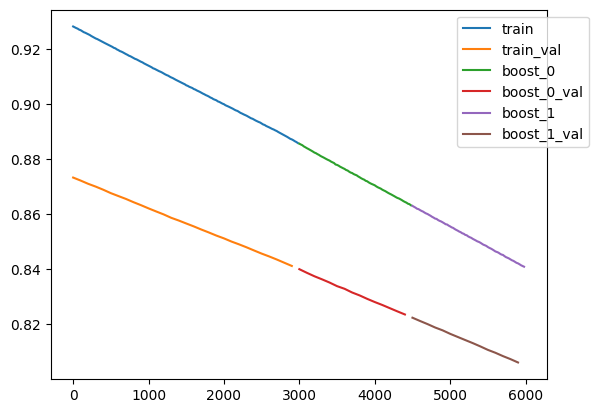

In [10]:
folder = "data/mooc/"
orchestrator = Orchestrator(folder)
train_metrics = orchestrator.create_embedding()

In [18]:
# save results
import pickle
train_config = orchestrator.config.copy()
train_config['metrcis'] = train_metrics
res_filename = 'data/mooc/exp_results/graphcase_final_run_metrics.pickle'
pickle.dump(train_config, open(res_filename, 'wb'))

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': '0'}>],
       [<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: >]], dtype=object)

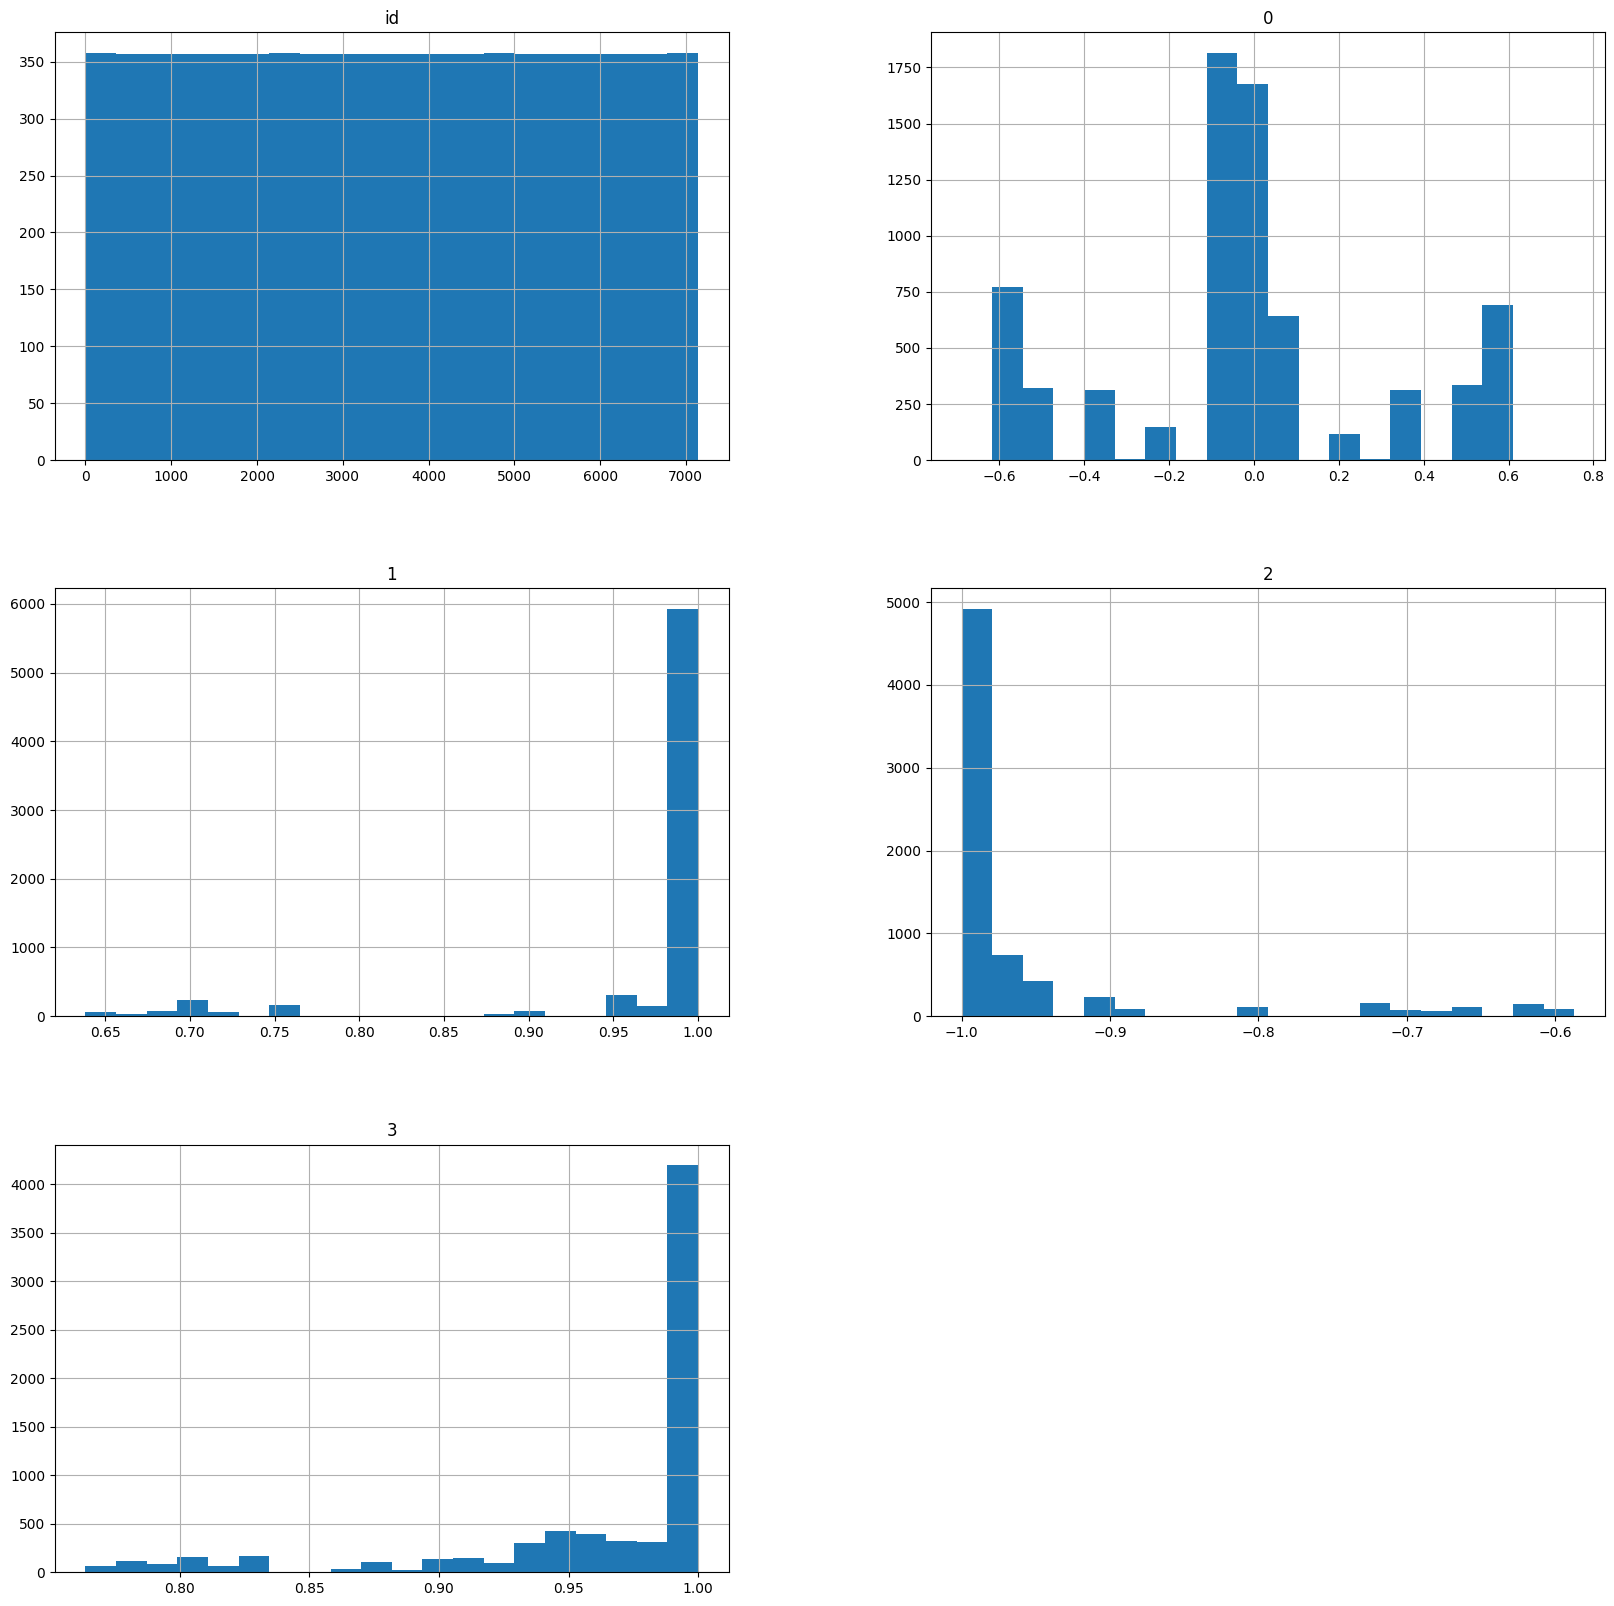

In [19]:
# convert final embedding to csv for tensorflow embedding viewer
import pandas as pd
embed = pd.read_parquet("data/mooc/embed/embedding.parquet")
embed.to_parquet("data/mooc/embed/embedding_final.parquet")
embed.to_csv("data/mooc/embed/embedding_final.csv", sep='\t', header=False, index=False, )
embed.hist(figsize=(20,20), bins=20)

## flownet training

2023-10-20 14:15:26.100952: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-10-20 14:15:26.100995: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-10-20 14:15:26.101003: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-10-20 14:15:26.101230: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-20 14:15:26.101615: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 2981/3000  ['loss:-27.1622257232666', 'val_loss:166932.484375']]]]']]]

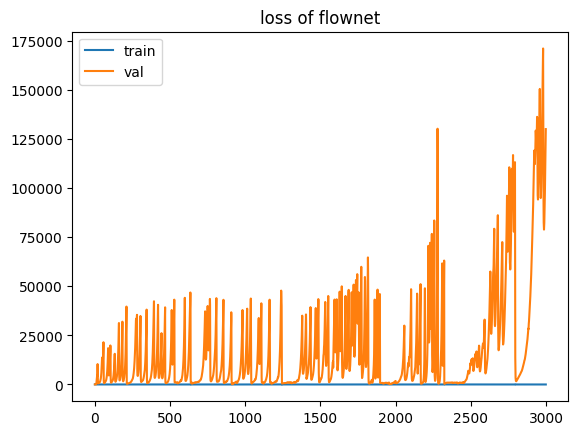

Epoch 2981/3000  ['loss:-26.33672332763672', 'val_loss:852114.75']']]]]']']

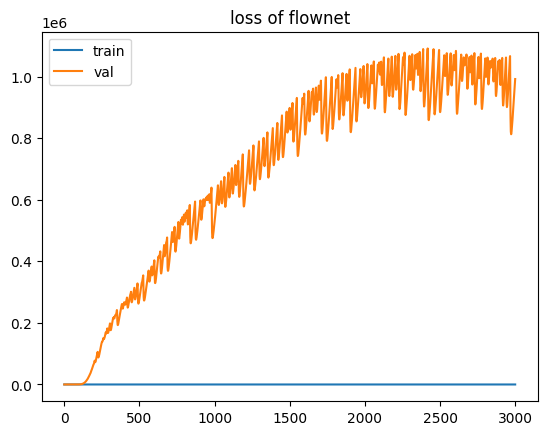

Epoch 2981/3000  ['loss:-21.09735107421875', 'val_loss:4617731.0']]]]]]]']']]']

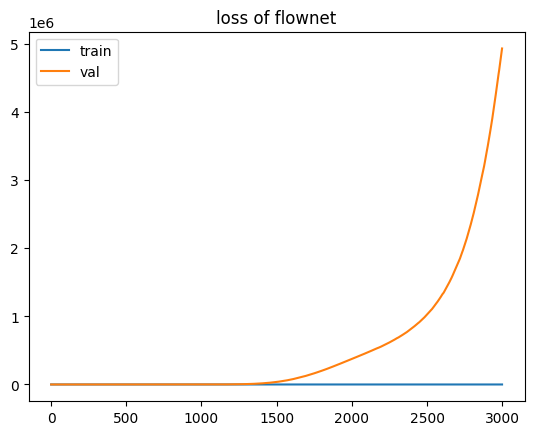

loss: [-27.17944574356079, -26.422868728637695, -21.114452362060547]
val loss: [120981.009765625, 979921.9375, 4907810.5]
Duration: 524.3408319950104


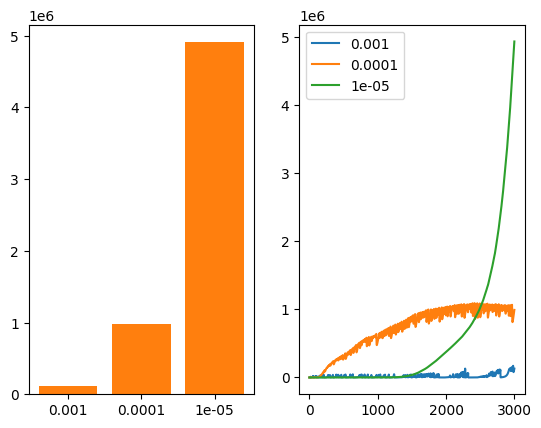

In [20]:
folder = "data/mooc/"
orchestrator = Orchestrator(folder)
start = time.time()
res = orchestrator.lin_grid_search_flownet({"learning_rate": [0.001, 0.0001, 0.00001]})
end = time.time()
print(f"Duration: {end-start}")

In [ ]:
folder = "data/mooc/"
orchestrator = Orchestrator(folder)
start = time.time()
res = orchestrator.lin_grid_search_flownet({"number_of_bijectors": [4, 6, 8]})
end = time.time()
print(f"Duration: {end-start}")

2023-10-20 20:17:21.270398: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-10-20 20:17:21.270427: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-10-20 20:17:21.270436: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-10-20 20:17:21.270476: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-20 20:17:21.270500: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1061/1500  ['loss:-6.009517192840576', 'val_loss:-3.8845038414001465']]

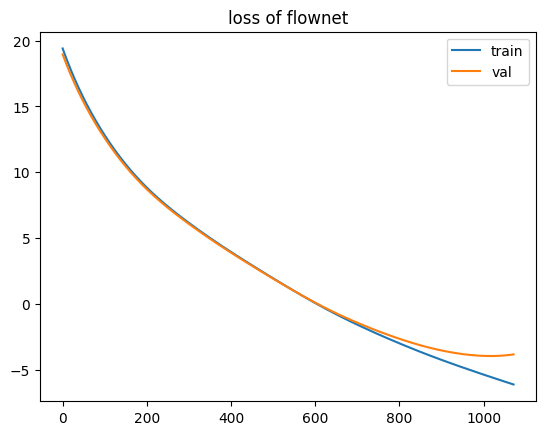

In [2]:
#final flow model
folder = "data/mooc/"
orchestrator = Orchestrator(folder)
name, history = orchestrator.train_flow()
#1m39 val_loss -4

In [3]:
# save results
import pickle
train_config = orchestrator.config.copy()
train_config['metrics'] = history.history
res_filename = 'data/mooc/exp_results/flownet_final_run_metrics.pickle'
pickle.dump(train_config, open(res_filename, 'wb'))

In [4]:
# convert final embedding to csv for tensorflow embedding viewer
import pandas as pd
filepath = orchestrator.config_path + orchestrator.config['flownet']['flownet_config_path']
obj = pickle.load(open(filepath + name, 'rb'))
# pickle.dump(obj,open(filepath + "flowmodel_final.pickle", 'wb'))

## sample flownet

In [5]:
# Sample flow net
# folder = "data/mooc/"
# orchestrator = Orchestrator(folder)
# model_name = "flowmodel_final.pickle"
orchestrator.sample_flownet()

In [6]:

# convert final embedding to csv for tensorflow embedding viewer
import pandas as pd
embed = pd.read_parquet('data/mooc/synth_nodes.parquet')
embed.to_parquet('data/mooc/synth_nodes_final.parquet')
embed.to_csv("data/mooc/synth_nodes_files.csv", sep='\t', header=False, index=False, )

In [7]:
folder = "data/mooc/"
orchestrator = Orchestrator(folder)
orig_node = orchestrator._load_nodes()
orig_embed = orchestrator.load_normalized_embed()
x_data = orig_embed.join(orig_node, how='inner')


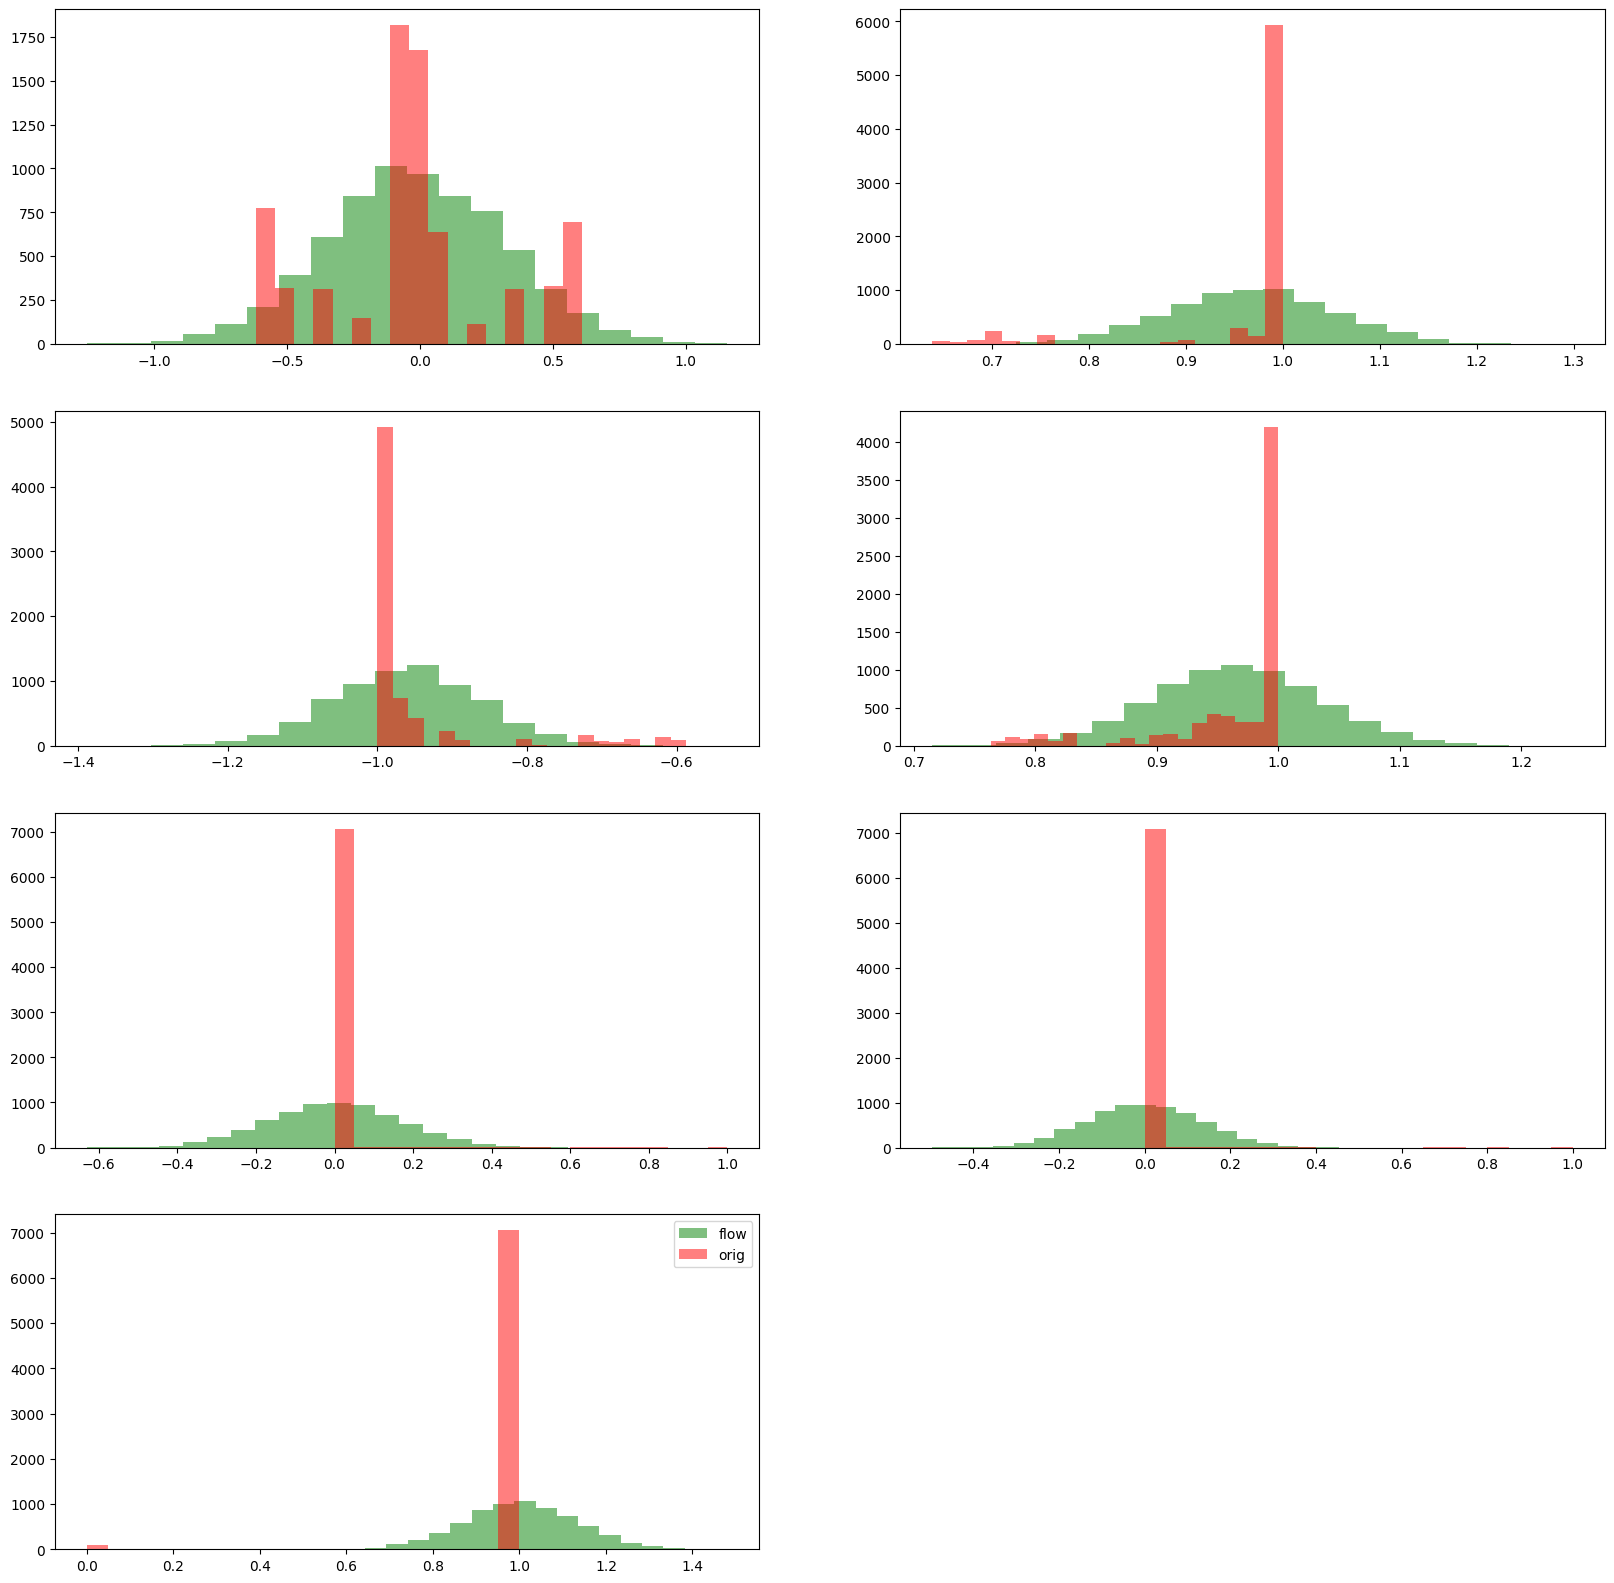

In [8]:
# plot samples embedding
import matplotlib.pyplot as plt
import math
fig = plt.figure(figsize=(20,20))
dim = embed.shape[1]
for i in range(dim):
    ax = fig.add_subplot(math.ceil(dim/2),2, i+1)
    ax.hist(embed.loc[:, i], bins=20, alpha=0.5, color='g', label='flow')
    ax.hist(x_data.iloc[:, i], bins=20, alpha=0.5, color='r', label='orig')

plt.legend()
plt.show()


## train lstm

/Users/tonpoppe/workspace/tigger_adj_rep/tigger_adj/tigger_package/inductive_controller.py:232: UserWarning: feat df has 150 rows and vocab has 151 instead of 152. This can be cause by unconnected nodes.
  warnings.warn(f"feat df has {nodes.shape[0]} rows and vocab has {node_attr.shape[0]} instead of {nodes.shape[0] + 2}. This can be cause by unconnected nodes.")
/Users/tonpoppe/anaconda3/envs/tigger/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


  0%|          | 0/2689 [00:00<?, ?it/s]

Number of components, 14


/Users/tonpoppe/anaconda3/envs/tigger/lib/python3.11/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 2950 / 3000, epoch:399 loss=3.03436017036438, val_loss: 3.904753446578979595

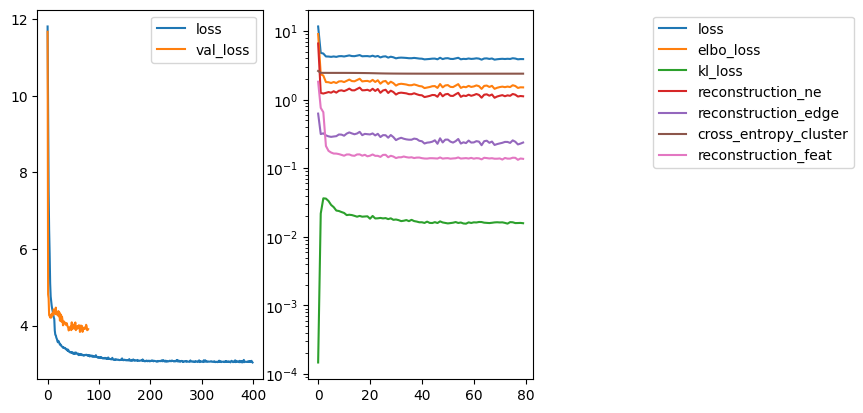

In [2]:
folder = "data/mooc/"
orchestrator = Orchestrator(folder)
# res = orchestrator.lin_grid_search_lstm({'lr': [0.001, 0.0005, 0.0001]})
loss_dict = orchestrator.train_lstm()
# loss=3.529276132583618, val_loss: 3.1
# 

In [3]:
loss_dict['val_dict'].keys()

dict_keys(['loss', 'elbo_loss', 'kl_loss', 'reconstruction_ne', 'reconstruction_edge', 'cross_entropy_cluster', 'reconstruction_feat'])

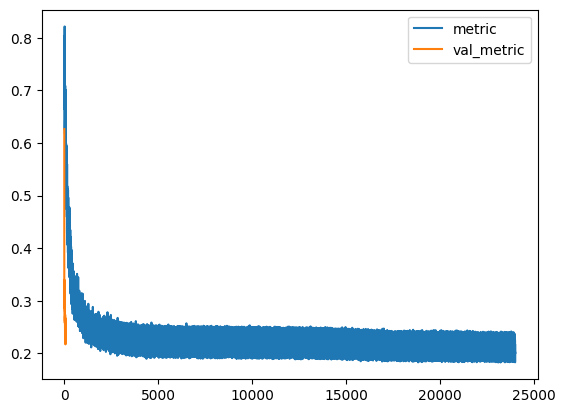

In [4]:
import matplotlib.pyplot as plt
metric = 'reconstruction_edge'
plt.plot(loss_dict[metric], label='metric')
plt.plot(loss_dict['val_dict'][metric], label='val_metric')
# plt.plot(loss_dict['val_dict']['loss'], label='val_loss')
plt.legend()
plt.show()

In [5]:
# create synthetic walks
# loss_dict = orchestrator.train_lstm()
orchestrator.create_synthetic_walks(target_cnt=3000, map_real_time=False)

In [6]:
# convert final embedding to csv for tensorflow embedding viewer
import pickle
obj = pickle.load(open('data/mooc/synth_walks.pickle', 'rb'))
pickle.dump(obj, open('data/mooc/synth_walks_final.pickle', 'wb'))

## create synthetic graph

In [7]:
folder = "data/mooc/"
orchestrator = Orchestrator(folder)
orchestrator.generate_synth_graph()

/Users/tonpoppe/workspace/tigger_adj_rep/tigger_adj/tigger_package/inductive_controller.py:232: UserWarning: feat df has 150 rows and vocab has 151 instead of 152. This can be cause by unconnected nodes.
  warnings.warn(f"feat df has {nodes.shape[0]} rows and vocab has {node_attr.shape[0]} instead of {nodes.shape[0] + 2}. This can be cause by unconnected nodes.")
/Users/tonpoppe/anaconda3/envs/tigger/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


  0%|          | 0/2689 [00:00<?, ?it/s]

/Users/tonpoppe/anaconda3/envs/tigger/lib/python3.11/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Number of components, 14


In [8]:
import pandas as pd
embed = pd.read_parquet('data/mooc/synth_graph/node_attributes.parquet')
embed.to_parquet('data/mooc/synth_graph/node_attributes_final.parquet')
embed = pd.read_parquet('data/mooc/synth_graph/adjacency.parquet')
embed.to_parquet('data/mooc/synth_graph/adjacency_final.parquet')